In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from osgeo import gdal_array

In [7]:
path = '../data/geo/'
arr = gdal_array.LoadFile(path + 'lrr_4.tif')

h,w = arr.shape
ratio = w/h
iw = 16
ih = iw/ratio
(ratio, iw, ih)

(1.1092077087794432, 16, 14.424710424710426)

In [8]:
img = cv.normalize(src=arr, dst=None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8UC1)
tgt = np.copy(img)

In [6]:
F1 = np.fft.fft2(img)

In [7]:
(img.shape, F1.shape)

((934, 1036), (934, 1036))

In [8]:
(img[0,0:10], F1[0,0:10])

(array([91, 92, 94, 94, 95, 95, 94, 94, 94, 96], dtype=uint8),
 array([9.56784100e+07-7.20319804e-10j, 5.05126697e+03-1.74957397e+03j,
        6.87077919e+03-2.28695825e+03j, 7.42039958e+03-7.33462838e+02j,
        5.92861195e+03+2.04356151e+03j, 8.00850356e+03+3.95547188e+03j,
        9.60698859e+03+2.17842445e+03j, 4.55065052e-01-2.00433023e+03j,
        5.87527003e+03-2.79608178e+03j, 8.59907360e+03-1.05570105e+03j]))

In [9]:
row, col = F1.shape
(row,col)

(934, 1036)

In [10]:
X = np.linspace(1, col, col)
Y = np.linspace(1, row, row)

In [11]:
[X1, Y1] = np.meshgrid(X, Y)

In [12]:
%run ../geo/hough/surfature.py

In [13]:
F1.shape

(934, 1036)

In [14]:
[gc, mc, pmax, pmin] = surfature(X1, Y1, F1)

In [15]:
gc

array([[-4.47470640e-33+4.99247333e-37j, -8.58505607e-24+1.48283655e-24j,
         1.66437834e-11-1.58868910e-11j, ...,
         1.11618173e-16+5.09712348e-17j,  3.92217932e-16-1.37025674e-15j,
        -9.92672388e-16+2.69829090e-16j],
       [-2.03600312e-22+8.01536798e-24j, -4.15708769e-06+3.99798303e-06j,
        -2.62774585e-14+2.56026186e-14j, ...,
         1.53577506e-15+5.64093074e-15j,  1.07927195e-13-2.89545406e-13j,
        -1.13490275e-15+5.21998583e-16j],
       [ 3.80632231e-10+4.36481847e-10j,  5.97052309e-13-3.89714874e-13j,
        -2.39927078e-15-2.06071724e-15j, ...,
         1.43260341e-14+2.31186222e-14j,  5.47900228e-14+5.31947099e-14j,
         3.34394717e-14-2.90251085e-14j],
       ...,
       [-1.46989078e-13+1.06193286e-13j, -2.87969534e-14+1.77720777e-13j,
         3.63899870e-14+1.46325830e-14j, ...,
         5.99351369e-13+8.58345788e-13j, -7.08040009e-14-2.47001051e-14j,
        -1.73623362e-15-1.10637308e-15j],
       [ 4.56833065e-14+7.22641722e-14j, -4.

In [16]:
FF = gc<0
FF

array([[ True,  True, False, ..., False, False,  True],
       [ True,  True,  True, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False,  True,  True],
       [False,  True,  True, ..., False,  True, False],
       [False, False, False, ..., False,  True, False]])

In [17]:
def show_image(arr, title='Title'):
    fig = plt.figure(figsize=(iw,ih))
    plt.title(title)
    plt.imshow(arr, cmap='gray')

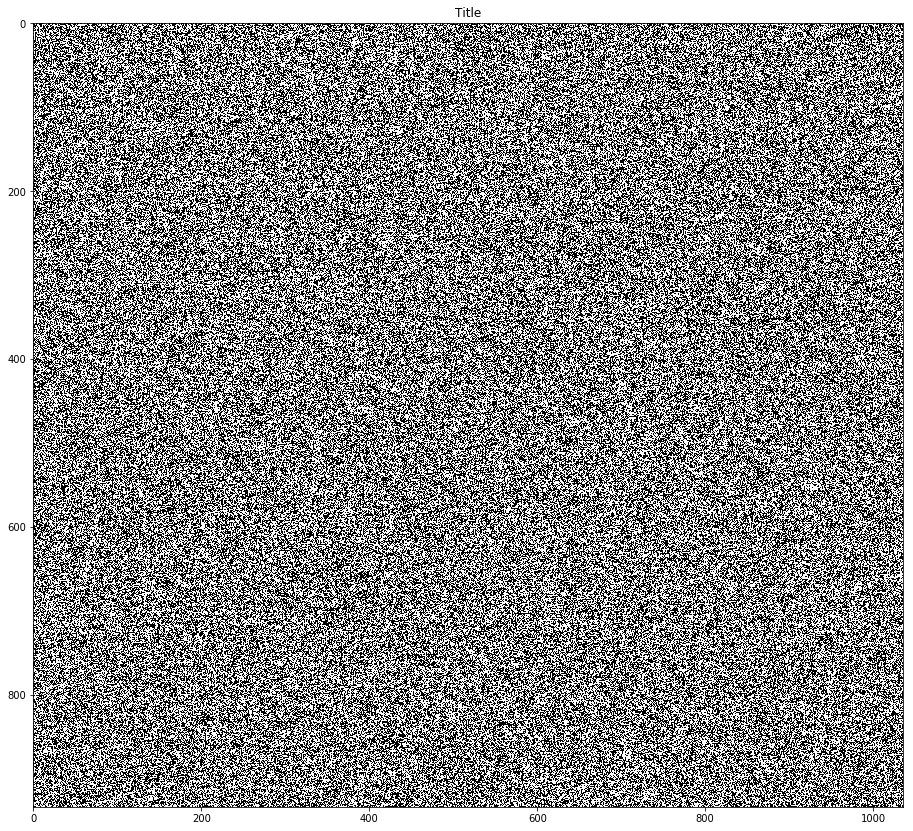

In [18]:
show_image(FF)

In [32]:
from skimage.morphology import disk
from skimage.filters import rank
#img = data.camera()
#med = median(img, disk(5))

In [33]:
rank.mean(np.ones((5,5)), disk(3, dtype=np.float64))

array([[255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255]], dtype=uint8)

In [36]:
disk(3, dtype=np.float64)

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])